# Word2vec

In [8]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [9]:
!pip install pythainlp
!pip install matplotlib==3.2.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 34.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 38.4 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3


In [10]:
#import library ที่ใช้
import pandas as pd
import re
import string

# Dataset 

*   Scraping จาก www.snook.com ระหว่างวันที่ 1 ก.พ. 2023 ถึง 23  ก.พ. 2023




In [2]:
!pip install -q colorama

In [6]:
from colorama import Fore, Back, Style
print(Fore.GREEN, Back.BLACK, 'ง่วงนอนจัง', Style.RESET_ALL)
print('ตื่นแล้ว')

  ง่วงนอนจัง 
ตื่นแล้ว


In [11]:
df=pd.read_csv('/content/drive/MyDrive/NLP/Day2/Word2vec/word2vec.csv')
df.head()

,Unnamed: 0,Text
0,0,ไม่ว่าจะปีเก่าหรือปีใหม่ สิ่งที่ผู้คนให้ความสน...
1,1,เรื่องปกติที่องค์กรต่าง ๆ จะเฟ้นหาบุคลากรที่มี...
2,2,“ทัศนคติ” มักจะถูกนำมาพิจารณาเป็นก้าวแรกสู่ควา...
3,3,Growth Mindset เป็นลักษณะความคิดและความเชื่อว่...
4,4,เนื่องจาก Growth Mindset เป็นกรอบแนวคิดของคนที...


In [12]:
df['Text'][2000]

'วันนี้ทีม Sanook Hitech ได้รับโอกาสนี้พาคุณไปชม คอมพิวเตอร์รุ่นใหม่ทั้งหมด (ยกเว้น ASUS TUF Gaming ที่จะวางจำหน่ายไปเลยในช่วงปลายเดือน กุมภาพันธ์ นี้) จะมีหน้าตาและความรู้สึกอย่างไร รับชมได้เลย'

# Preprocessing Text

**การทำความสะอาดข้อความหรือ preprocessing**

*   แปลงตัวอักษรภาษาอังกฤษจากตัวพิมพ์ใหญ่เป็นตัวพิมพ์เล็ก
*   ลบ \n ออกจากข้อความ
*   ลบ punctuation ออกจากข้อความ

ในกรณีที่ต้องการพิจารณาคำย่อหรือเว็ปไซด์ อาจจะพิจารณาลบ punctuation ออกแค่บางตัว

In [13]:
def preprocess_cleansing(text):
      ''' Converting  text to lower case
      and  removing all punctuation'''
      # แปลงตัวอักษรตัวใหญ่ให้เป็นตัวเล็กทั้งหมด
      text=text.lower()
      # ลบ punctuation ทั้งหมด
      text = re.sub('\n', ' ', text)
      text = re.sub(r'[{}]'.format(string.punctuation), ' ', text)
      text = re.sub('xa0|u200b', ' ', text)
      return text

In [14]:
df['Text']=df['Text'].astype(str)

In [15]:
# ทำความสะอาดข้อความใน list
df['Text']=df['Text'].apply(lambda x:preprocess_cleansing(x))

# Tokenization

In [16]:
from pythainlp.tokenize import word_tokenize

In [17]:
# ตัดคำโดยใช้คำสั่ง word_tokenize() ซึ่งใช้อัลกอริทึมของ newmm
df['Tokenizer']=df['Text'].apply(lambda x:word_tokenize(x, engine="newmm"))

# Word2Vec model

In [18]:
from gensim.models import Word2Vec

In [19]:
# นำคำที่ตัดเรียบร้อยแล้วจาก dataframe ให้อยู่ในรูปของ list
text_list=df['Tokenizer'].tolist()

In [20]:
text_list[:1]

[['ไม่',
  'ว่า',
  'จะ',
  'ปี',
  'เก่า',
  'หรือ',
  'ปีใหม่',
  ' ',
  'สิ่ง',
  'ที่',
  'ผู้คน',
  'ให้ความสนใจ',
  'ก็',
  'คงจะ',
  'หนี',
  'ไม่',
  'พ้น',
  'เรื่อง',
  'ของ',
  'ปากท้อง',
  'เป็นสำคัญ',
  ' ',
  'คน',
  'ทำงาน',
  'ยัง',
  'ต้อง',
  'ตั้งหน้าตั้งตา',
  'พัฒนา',
  'ตัวเอง',
  'เพื่อ',
  'ให้ได้',
  'ไป',
  'ต่อ',
  'ใน',
  'สายงาน',
  'ที่',
  'ทำ',
  'อยู่',
  ' ',
  'เพราะ',
  'นอกจาก',
  'เทคโนโลยี',
  'จะ',
  'เข้ามา',
  'เป็น',
  'ตัวแปร',
  'สำคัญ',
  'แล้ว',
  ' ',
  'คน',
  'ด้วย',
  'กันเอง',
  'ก็',
  'ยังคง',
  'เป็น',
  'คู่แข่ง',
  ' ',
  'เพราะ',
  'ถ้าหาก',
  'องค์กร',
  'จำเป็นต้อง',
  'ลด',
  'ขนาด',
  'เพื่อให้',
  'สอดคล้อง',
  'กับ',
  'สภาวะเศรษฐกิจ',
  ' ',
  'คน',
  'ทำงาน',
  'ส่วนหนึ่ง',
  'ต้อง',
  'ออกจาก',
  'สายงาน',
  'ไป',
  ' ',
  'และ',
  'มี',
  'บางส่วน',
  'ที่',
  'ได้',
  'อยู่',
  'ต่อ',
  ' ',
  'คำถาม',
  'คือ',
  ' ',
  'คน',
  'ทำงาน',
  'แบบ',
  'ไหนล่ะ',
  'ที่',
  'องค์กร',
  'จะ',
  'ยัง',
  'เก็บ',
  'ไว้',
  ' 

In [21]:
# train word2vec model โดยresultที่ออกมามีขนาด 256 
# และwindow คือ 15 และจำนวนคำที่ที่มีอย่างน้อย 1 คำ
model = Word2Vec(sentences=text_list, size=256, window=10, min_count=1)

In [22]:
model.save("word2vec.model")

In [23]:
model = Word2Vec.load("word2vec.model")

In [24]:
#  คำที่มีความคล้ายกับ 'ฟุตบอล'
model.wv.most_similar('ฟุตบอล', topn=10)

[('ทัวร์นาเมนต์', 0.9797791838645935),
 ('ศึก', 0.9729839563369751),
 ('2026', 0.971495509147644),
 ('เอเชีย', 0.957472562789917),
 ('คัพ', 0.9572654962539673),
 ('รายการ', 0.9526100754737854),
 ('เอสโตเนีย', 0.9522134065628052),
 ('เป็นหนึ่ง', 0.9506009221076965),
 ('กรังด์ปรีซ์', 0.9471727609634399),
 ('โว่', 0.9466956853866577)]

In [25]:
# คำที่มีความคล้ายกับ 'เกม'
model.wv.most_similar('เกม', topn=10)

[('เล่น', 0.8794541358947754),
 ('อำลา', 0.8410808444023132),
 ('โดยปริยาย', 0.8114873170852661),
 ('กลับมา', 0.7957291007041931),
 ('รุก', 0.7848808765411377),
 ('metroid', 0.7841635942459106),
 ('ต่อสัญญา', 0.7768363952636719),
 ('เข้ารอบ', 0.7681746482849121),
 ('ก่อน', 0.7651649713516235),
 ('ยิงประตู', 0.7641452550888062)]

# Visualize word from Word2vec model

In [26]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib as mpl

# เพิ่ม font เพื่อให้ matplotlib แสดงผลเป็นภาษาไทย
font_path = '/content/drive/MyDrive/NLP/Day2/POS_NER_analysis/THSarabunChula-Regular.ttf'
mpl.font_manager.fontManager.addfont(font_path)
mpl.rc('font', family='TH Sarabun Chula',size=20)

In [27]:
# คำที่ต้องการพิจารณา
words =  ['ขึ้นเงิน', 'พอควร',  'timeline', 'กาวใจ', 
          'สมานฉันท์', 'ผู้ตรวจสอบ','ฟุตบอล','ท่องเที่ยว',
          'สาธารณสุข','เตรียมพร้อม','วงจร','ต่างประเทศ']

In [28]:
# หาค่า word2vec จากคำที่ต้องการพิจารณา
word_vectors = [model[w] for w in words]

In [29]:
# เนื่องจากคำที่มาจาก model มีขนาดของ vectorเป็น 256 ทำให้ยากต่อการพิจารณา
# จึงแปลง vector ให้เป็น 2 โดยใช้เทคนิคของ PCA
pca=PCA(n_components=2)
twodim = pca.fit_transform(word_vectors)

In [30]:
len(word_vectors[0])

256

In [32]:
word_vectors[0]

array([ 2.26682052e-03, -4.33041598e-04,  4.32424713e-03,  2.39195605e-03,
       -5.13025979e-03, -5.81346406e-03, -3.62998503e-03, -1.20472815e-02,
        6.27603056e-03, -4.13413020e-03,  9.00976593e-04, -2.10748659e-03,
       -4.11801506e-03, -2.77088536e-03,  6.56372821e-03,  1.74835406e-03,
        2.93281768e-03, -3.32285021e-03,  9.72073583e-04,  1.55164488e-03,
        3.13689560e-03, -4.17804066e-03,  2.63579399e-03, -8.90609110e-04,
        1.08549255e-03,  3.42074572e-03, -2.07551382e-03,  4.62768279e-04,
       -2.24521849e-03,  4.91728913e-03, -2.78738723e-03,  3.89489997e-03,
        6.87600486e-03,  6.05412247e-03,  7.67149788e-04,  1.09059829e-02,
        6.27713685e-04, -6.10040326e-04,  2.54247163e-04, -3.53133510e-04,
        2.62283464e-03,  5.68769779e-03,  3.09497700e-03,  8.65605753e-03,
        1.42593449e-03, -1.94003561e-03,  3.09438072e-03,  7.79660244e-04,
        3.86095652e-03, -2.53981008e-04, -1.34693901e-03, -5.51264780e-03,
        5.98293683e-03, -

In [31]:
len(twodim[0])

2

In [33]:
twodim[0]

array([-0.81802395, -0.35320771])

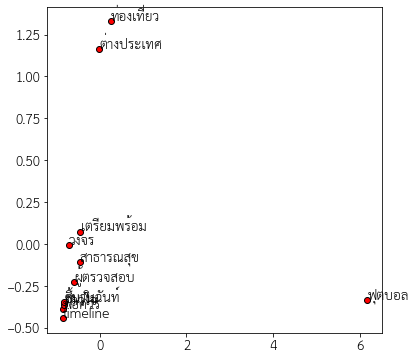

In [34]:
# สร้างกราฟเพื่อแสดงผล
plt.figure(figsize=(6,6))
plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
for word, (x,y) in zip(words, twodim):
        plt.text(x+0.005, y+0.005, word)
plt.show()

**Reference** 


*   https://web.stanford.edu/class/cs224n/materials/Gensim%20word%20vector%20visualization.html
*   https://avinashnavlani.medium.com/explore-python-gensim-library-for-nlp-a1adcea2bb8c
* https://radimrehurek.com/gensim/models/word2vec.html
https://colab.research.google.com/drive/1MLS0w6d2DRMS3lLUqrcKeWIQNXGc5k-t#scrollTo=ItjhGublY034


